<a href="https://colab.research.google.com/github/Mariclems/Student-performance-simulator/blob/main/QS0_705_Marie_Yapi_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:\
Hours Studied: The total number of hours spent studying by each student.\
Previous Scores: The scores obtained by students in previous tests.\
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).\
Sleep Hours: The average number of hours of sleep the student had per day.\
Sample Question Papers Practiced: The number of sample question papers the student practiced.\
Target Variable:

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance.\
SOURCE:
(https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # DECISION TREE
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression,LogisticRegression # REGRESSION


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/QSO_705/Student_Performance.csv'



In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Purpose

The following analysis is based the given “Student Performance” Dataset from Kaggle. This sample data was designed to examine the factors influencing academic student performance. We used data splitting to evaluate the data and train the model to build a suitable machine learning model. Our main purpose is to predict student performance index based on the factors that may influence it.


## 1. Data preparation

In [ ]:
# Drop rows with missing values
df = df.dropna()


In [ ]:
# Remove space in column name DataFrame
df.columns = df.columns.str.replace(' ', '_')
print(df)

      Hours_Studied  Previous_Scores Extracurricular_Activities  Sleep_Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample_Question_Papers_Practiced 

## Data Visualization

<ipython-input-9-42377ff4b2cc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


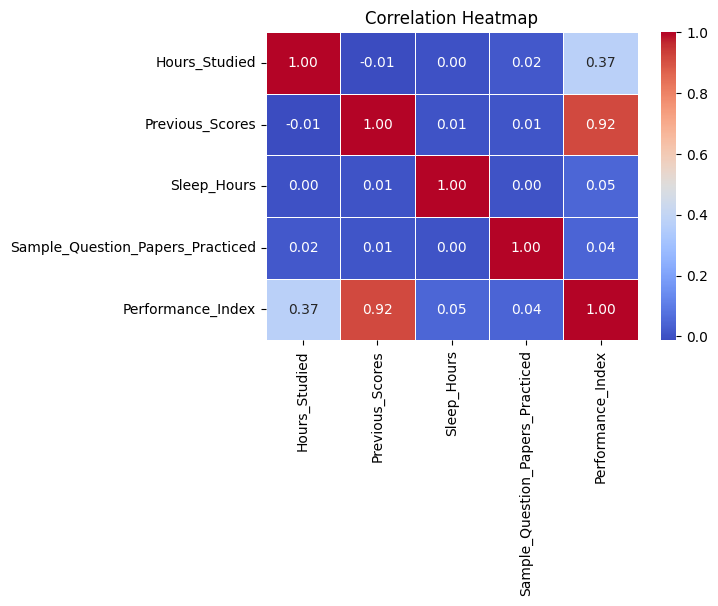

In [ ]:
# Checking relationship between variables
#Here we are creating a heatmap to check the correlation between our variables to determine which variables are highly correlated.
plt.figure(figsize=(6, 4))

sns.heatmap(df.corr(),
            annot = True,
            cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

### Interpretation
- Rule of Thumb for absolute value of correlation
    - 0.9 to 1 : Very High Correlation
    - 0.7 to .9 : High Correlation
    - 0.5 to 0.7 : Moderate Correlation
    - 0.3 to .5 : Low  Correlation
    - 0.0 to 0.3 : Negligible correlation


In [ ]:
# sns.pairplot(df)


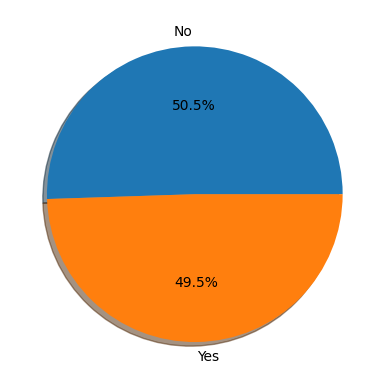

In [ ]:
plt.pie(df["Extracurricular_Activities"].value_counts(), labels = df["Extracurricular_Activities"].value_counts().index,
        shadow = True, autopct = "%1.1f%%")
plt.show()

<Axes: xlabel='Extracurricular_Activities', ylabel='Performance_Index'>

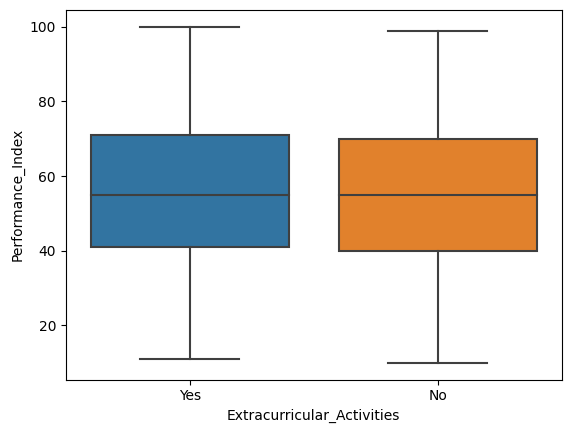

In [ ]:
#Extracurricular Activities" and "Performance Index" distribution
sns.boxplot(x='Extracurricular_Activities', y='Performance_Index', data=df)

-Participation in extracurricular activities helps to a very small extent in obtaining high grades

<Axes: xlabel='Sleep_Hours', ylabel='count'>

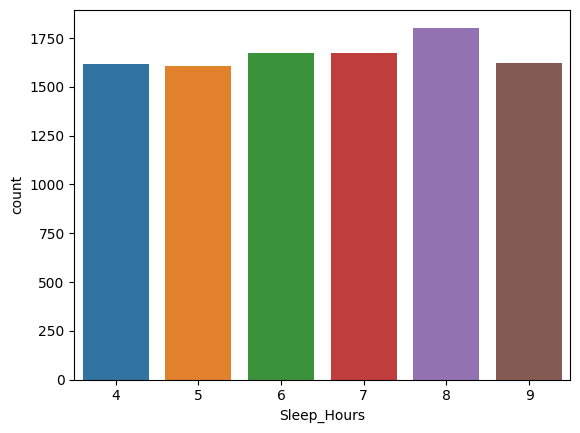

In [ ]:
# count of sleep per unique " Sleep_hours" values
sns.countplot(x='Sleep_Hours', data=df)


- Most student Sleep 8 hours
- Other students sleep Similar numbers of hours

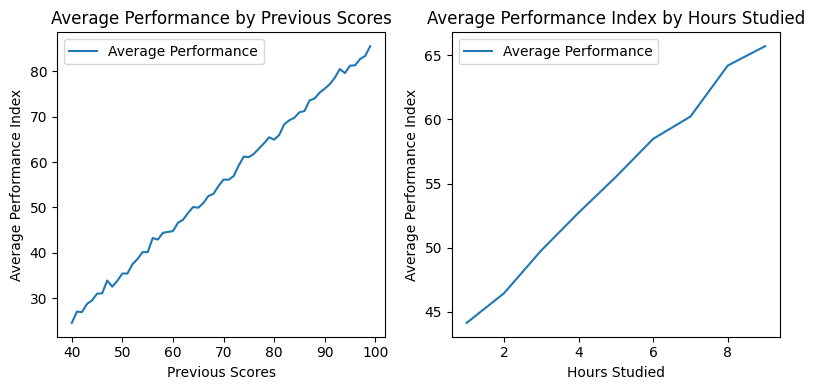

In [ ]:
avg_performance_by_prevscores = df.groupby('Previous_Scores')['Performance_Index'].mean()
avg_performance_by_hours_studied = df.groupby('Hours_Studied')['Performance_Index'].mean()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(avg_performance_by_prevscores.index, avg_performance_by_prevscores.values, label='Average Performance')
axes[0].set_title('Average Performance by Previous Scores')
axes[0].set_xlabel('Previous Scores')
axes[0].set_ylabel('Average Performance Index')
axes[0].legend()

axes[1].plot(avg_performance_by_hours_studied.index, avg_performance_by_hours_studied.values, label='Average Performance')
axes[1].set_title('Average Performance Index by Hours Studied')
axes[1].set_xlabel('Hours Studied')
axes[1].set_ylabel('Average Performance Index')
axes[1].legend()

plt.tight_layout()
plt.show()


- The more hours you study, Performance index increase
- The more higher the previous scores , Performance index increase

## 2. Simple Linear regression
Correlation Heatmap shows performance index and Previous_scores are highly correlated (0.92). This relation alone will explain much of the variation in student performance index.So we are going to use it to run a simple linear regression.
To ensure the good fit of the model We will include the following Accuracy measures: \
Mean Absolute Deviation\
Mean Error\
Root Mean Squared Error\
R square

In [ ]:
# Step 1: Split variables
X = df[['Previous_Scores']]
y = df['Performance_Index']

# Separate the data to train/test
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=570)

# Step 2: Train the model
model1 = LinearRegression()
model1.fit(train_X, train_y)

# Predictions on the training and validation sets
train_y_pred = model1.predict(train_X)
valid_y_pred = model1.predict(valid_X)

# Step 3: Evaluate the model
def accuracy_measure(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

train_mae, train_mse, train_rmse, train_r2 = accuracy_measure(train_y, train_y_pred)
valid_mae, valid_mse, valid_rmse, valid_r2 = accuracy_measure(valid_y, valid_y_pred)

# Step 4: Print the results
print("Model 1 coefficent: " ,model1.coef_)
print("Model 1 intercept: " ,model1.intercept_)
print("Training Set:")
print("Mean Absolute Deviation (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)
print("\nValidation Set:")
print("Mean Absolute Deviation (MAE):", valid_mae)
print("Mean Squared Error (MSE):", valid_mse)
print("Root Mean Squared Error (RMSE):", valid_rmse)
print("R-squared (R2):", valid_r2)

Model 1 coefficent:  [1.01493324]
Model 1 intercept:  -15.265572714956534
Training Set:
Mean Absolute Deviation (MAE): 6.663722544849931
Mean Squared Error (MSE): 61.04782120037817
Root Mean Squared Error (RMSE): 7.813310514780413
R-squared (R2): 0.8367950484138474

Validation Set:
Mean Absolute Deviation (MAE): 6.485598668310811
Mean Squared Error (MSE): 57.39022426238704
Root Mean Squared Error (RMSE): 7.57563358818172
R-squared (R2): 0.8393150799423926


### Interpretation of result
Performance_Index= -15.27+1.01x Previous_Scores\
This means that, on average, a one-unit increase in the 'Previous_Scores' is associated with an increase of approximately 1.0149 units in the 'Performance_Index'.The intercept is -15.2656 which represents the predicted 'Performance_Index' when the 'Previous_Scores' is zero.\
R-square indicates that approximately 83.68% of the variability in the Performance Index is explained by 'Previous_Scores' alone.
Overall, Model 1 seems to perform reasonably well in predicting the Performance Index based on the 'Previous_Scores' variable alone, with a high R-squared value indicating a good fit to the data.

In [ ]:
# Predict using the trained Model 1
predict = np.round(model1.predict(valid_X), decimals=1)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual Performance": valid_y, "Predicted Performance": predict})

# Print the DataFrame
print(results_df)

      Actual Performance  Predicted Performance
5673                43.0                   51.7
8913                41.0                   38.5
3492                38.0                   39.5
1000                76.0                   66.9
5389                75.0                   69.0
...                  ...                    ...
5253                86.0                   80.1
8370                85.0                   73.0
2187                40.0                   42.6
999                 71.0                   75.1
3682                69.0                   69.0

[3000 rows x 2 columns]


## 3. Multiple linear regression

In [ ]:
#  1.The possibility that all independant variables are significant
#Multiple linear regression

# One-hot encode the 'Extracurricular_Activities' column
df_encoded = pd.get_dummies(df, columns=['Extracurricular_Activities'], drop_first=True)

excluded_columns = ['Performance_Index']  # Exclude dependent variable
features = [col for col in df_encoded.columns if col not in excluded_columns]
X_all = df_encoded[features]
y_all= df_encoded['Performance_Index']
# Separate the data to train/test
train_X_all, valid_X_all, train_y_all, valid_y_all = train_test_split(X_all, y_all, test_size=0.3, random_state=570)

# Step 2: Train the model
model2 = LinearRegression()
model2.fit(train_X_all, train_y_all)

# Predictions on the training and validation sets
train_y_pred_all = model2.predict(train_X_all)
valid_y_pred_all = model2.predict(valid_X_all)

# Step 3: Evaluate the model
train_mae_all, train_mse_all, train_rmse_all, train_r2_all = accuracy_measure(train_y_all, train_y_pred_all)
valid_mae_all, valid_mse_all, valid_rmse_all, valid_r2_all = accuracy_measure(valid_y_all, valid_y_pred_all)

# Step 4: Print the results
print("Model 2 coefficent: " ,model2.coef_)
print("Model 2 intercept: " ,model2.intercept_)
print("Multiple Linear Regression (All Variables) - Training Set:")
print("Mean Absolute Deviation (MAE):", train_mae_all)
print("Mean Squared Error (MSE):", train_mse_all)
print("Root Mean Squared Error (RMSE):", train_rmse_all)
print("R-squared (R2):", train_r2_all)
print("\nMultiple Linear Regression (All Variables) - Validation Set:")
print("Mean Absolute Deviation (MAE):", valid_mae_all)
print("Mean Squared Error (MSE):", valid_mse_all)
print("Root Mean Squared Error (RMSE):", valid_rmse_all)
print("R-squared (R2):", valid_r2_all)

Model 2 coefficent:  [2.86061209 1.0182317  0.48217784 0.193361   0.6017842 ]
Model 2 intercept:  -34.10108436803124
Multiple Linear Regression (All Variables) - Training Set:
Mean Absolute Deviation (MAE): 1.6080962186257972
Mean Squared Error (MSE): 4.113907525031479
Root Mean Squared Error (RMSE): 2.028276984297628
R-squared (R2): 0.9890018994085162

Multiple Linear Regression (All Variables) - Validation Set:
Mean Absolute Deviation (MAE): 1.6394655470432153
Mean Squared Error (MSE): 4.240205900111787
Root Mean Squared Error (RMSE): 2.059176024557344
R-squared (R2): 0.9881279929666733




The RMSE values indicate the average magnitude of errors, and the lower these values, the better the model's predictive performance. The model appears to have a very optimistic fit based on the training set metrics, as indicated by the R-squared value of 0.9889 as well the validation set is similar, with an R-squared value of 0.9888, suggesting that the model's performance is consistent between training and validation sets.R-square is very close to 1 suggesting that the model explains a high proportion (98% ) of the variance in the Performance Index based on the given predictor variables.


In [ ]:
# Predict using the trained Model 2
predict = np.round(model2.predict(valid_X_all), decimals=1)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual Performance": valid_y_all, "Predicted Performance": predict})

# Print the DataFrame
print(results_df)

      Actual Performance  Predicted Performance
5673                43.0                   40.1
8913                41.0                   41.4
3492                38.0                   37.1
1000                76.0                   74.1
5389                75.0                   71.7
...                  ...                    ...
5253                86.0                   86.3
8370                85.0                   86.9
2187                40.0                   39.7
999                 71.0                   70.4
3682                69.0                   67.8

[3000 rows x 2 columns]


  ### Visualization (scatterplot)

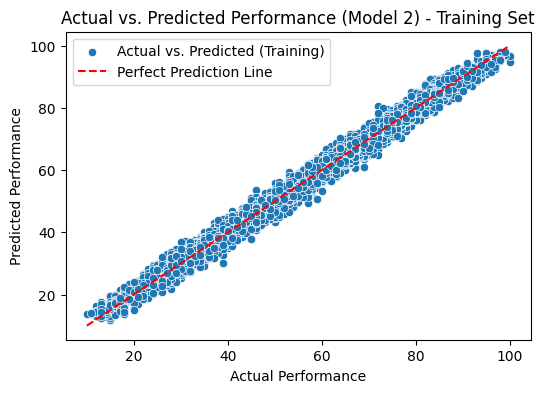

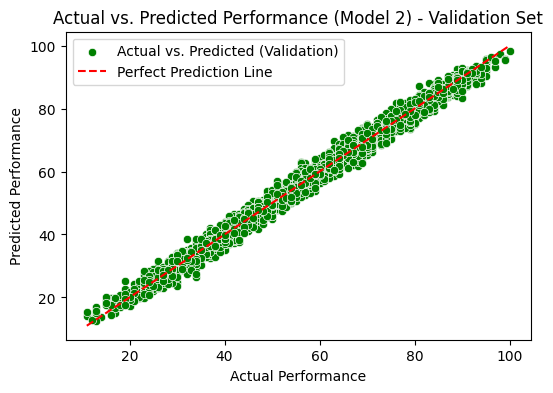

<Figure size 640x480 with 0 Axes>

In [ ]:
# Scatter plot for the training set Model 2
plt.figure(figsize=(6, 4))
sns.scatterplot(x=train_y_all, y=train_y_pred_all, label='Actual vs. Predicted (Training)')
plt.plot([min(train_y_all), max(train_y_all)], [min(train_y_all), max(train_y_all)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Performance (Model 2) - Training Set')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.legend()
plt.show()

# Scatter plot for the validation set Model 2
plt.figure(figsize=(6, 4))
sns.scatterplot(x=valid_y_all, y=valid_y_pred_all,color= 'green',label='Actual vs. Predicted (Validation)')
plt.plot([min(valid_y_all), max(valid_y_all)], [min(valid_y_all), max(valid_y_all)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Performance (Model 2) - Validation Set')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()


## MonteCarlo Simulation

Now that we have predicted the student performance Index, we want to make a best case/ worst case analysis i.e. predict the probability of students getting good/bad grades depending on the independent factors.
We want to use a montecarlo simulation for the following : \
- probability of a student getting A+ \
- probability of a student getting  minimum A with at least 8 hours of sleep
- probability of a student getting letter Grade F with a previous score of 80

### Let's Create a column "Grade" that will assign letter grade to student consistent with their performance index

In [ ]:
# Create a function to assign grades based on performance index
def assign_grade(performance_index):
    if 97 <= performance_index <= 100:
        return 'A+'
    elif 93 <= performance_index <= 96:
        return 'A'
    elif 90 <= performance_index <= 92:
        return 'A-'
    elif 87 <= performance_index <= 89:
        return 'B+'
    elif 83 <= performance_index <= 86:
        return 'B'
    elif 80 <= performance_index <= 82:
        return 'B-'
    elif 77 <= performance_index <= 79:
        return 'C+'
    elif 73 <= performance_index <= 76:
        return 'C'
    elif 70 <= performance_index <= 72:
        return 'C-'
    elif 67 <= performance_index <= 69:
        return 'D+'
    elif 63 <= performance_index <= 66:
        return 'D'
    elif 60 <= performance_index <= 62:
        return 'D-'
    else:
        return 'F'
#create the 'Grade' column
df['Grade'] = df['Performance_Index'].apply(assign_grade)
print(df[['Performance_Index', 'Grade']])

      Performance_Index Grade
0                  91.0    A-
1                  65.0     D
2                  45.0     F
3                  36.0     F
4                  66.0     D
...                 ...   ...
9995               23.0     F
9996               58.0     F
9997               74.0     C
9998               95.0     A
9999               64.0     D

[10000 rows x 2 columns]


In [ ]:
#Step 1 create a function to simulate a student's performance
def simulate_student_performance(previous_scores, hours_studied, sleep_hours, sample_papers_practiced):
    # Assume linear relationship based on your previous models
    performance_index = model2.intercept_ + \
                        model2.coef_[0] * previous_scores + \
                        model2.coef_[1] * hours_studied + \
                        model2.coef_[2] * sleep_hours + \
                        model2.coef_[3] * sample_papers_practiced

    # Apply the grading function
    grade = assign_grade(performance_index)
    return grade

In [ ]:
# Monte Carlo simulation
num_simulations = 10000

# Simulate random samples for independent variables
simulated_previous_scores = np.random.choice(df['Previous_Scores'], num_simulations)
simulated_hours_studied = np.random.choice(df['Hours_Studied'], num_simulations)
simulated_sleep_hours = np.random.choice(df['Sleep_Hours'], num_simulations)
simulated_sample_papers_practiced = np.random.choice(df['Sample_Question_Papers_Practiced'], num_simulations)

# Simulate student performance and calculate probabilities
prob_B_plus = np.mean([simulate_student_performance(prev, hours, sleep, sample) == 'B+'and sample >=6 for prev, hours, sleep, sample in zip(simulated_previous_scores, simulated_hours_studied, simulated_sleep_hours, simulated_sample_papers_practiced)])
prob_min_A_with_8_hours_sleep = np.mean([simulate_student_performance(prev, hours, sleep, sample) in ['A+', 'A', 'A-'] and sleep >= 8 for prev, hours, sleep, sample in zip(simulated_previous_scores, simulated_hours_studied, simulated_sleep_hours, simulated_sample_papers_practiced)])
prob_grade_F_with_previous_score_80 = np.mean([simulate_student_performance(80, hours, sleep, sample) == 'F' for hours, sleep, sample in zip(simulated_hours_studied, simulated_sleep_hours, simulated_sample_papers_practiced)])

# Print results
print("Probability of a student getting B+ with at least 6 sample question practiced: {:.2%}".format(prob_A_plus))
print("Probability of a student getting minimum A with at least 8 hours of sleep: {:.2%}".format(prob_min_A_with_8_hours_sleep))
print("Probability of a student getting letter Grade F with a previous score of 80: {:.2%}".format(prob_grade_F_with_previous_score_80))

Probability of a student getting B+ with at least 6 sample question practiced: 1.88%
Probability of a student getting minimum A with at least 8 hours of sleep: 1.38%
Probability of a student getting letter Grade F with a previous score of 80: 100.00%


In [ ]:
# Simulate student performance and calculate probabilities
grade_counts = dict.fromkeys(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'], 0)

for i in range(num_simulations):
    simulated_grade = simulate_student_performance(
        simulated_previous_scores[i],
        simulated_hours_studied[i],
        simulated_sleep_hours[i],
        simulated_sample_papers_practiced[i]
    )
    grade_counts[simulated_grade] += 1

# Calculate probabilities
grade_probabilities_model2 = {grade: count / num_simulations for grade, count in grade_counts.items()}

# Print results
for grade, probability in grade_probabilities_model2.items():
    print(f"Probability of getting {grade}: {probability:.2%}")


Probability of getting A+: 1.88%
Probability of getting A: 1.90%
Probability of getting A-: 0.92%
Probability of getting B+: 0.57%
Probability of getting B: 0.27%
Probability of getting B-: 0.00%
Probability of getting C+: 0.00%
Probability of getting C: 0.00%
Probability of getting C-: 0.00%
Probability of getting D+: 0.00%
Probability of getting D: 0.00%
Probability of getting D-: 0.00%
Probability of getting F: 94.46%
